<a href="https://colab.research.google.com/github/AbimaelLopez/Diplomado/blob/main/12_Hierachical_clustering_ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **12 Hierachichal clustering**

### Objetivos
Que la o el estudiante conozca los conceptos relacionados con el agrupamiento aglomerativo y su uso con la biblioteca Scipy.

### Descripción del procedimiento a seguir
- Se utiliza el algoritmo de agrupamiento jerárquico *linkage* con datos sintéticos.
- Se observa el dendograma y se hace un corte para obtener los grupos
- Se hace al agrupamiento con los datos de MNIST digits.


### Datos
**Profesora**: Dra. Jessica Beltrán Márquez<br>
Maestría en Ciencia de Datos y Optimización<br>
Centro de Investigación en Matemáticas Aplicadas <br>
Universidad Autónoma de Coahuila


### Bibliografía
1. https://es.wikipedia.org/wiki/Base_de_datos_MNIST




## **1. Importar bibliotecas**

In [2]:
#Básicas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Agrupamiento jeraráquico
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#Preprocesamiento
from sklearn.preprocessing import StandardScaler

#Para conseguir datos
from sklearn.datasets import fetch_openml

## **2. Agrupamiento de un conjunto de datos sintético**


### **2.1 Lectura de datos**

In [2]:
df = pd.read_csv('/content/2Clusters.csv')
#Este es el otro conjunto que utilizaremos
#df = pd.read_csv('/content/drive/MyDrive/Curso ML Diplomado/11 Kmeans/3Clusters.csv')
df.head()

,x,y,Class
0,0.106163,0.880407,C1
1,0.077910,0.760641,C1
2,0.100754,0.710661,C1
3,0.050074,0.768947,C1
4,0.134432,0.710871,C1


## **2.2. Graficación de los puntos del conjunto de datos**

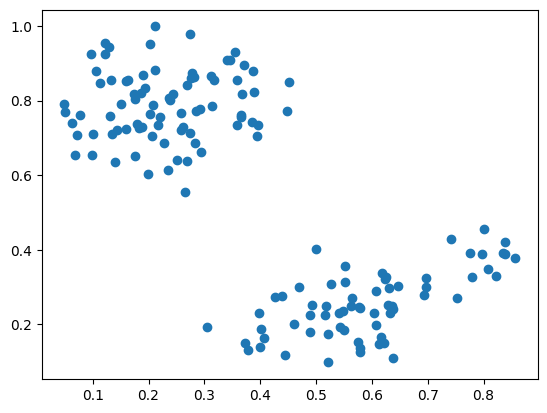

In [3]:
plt.scatter(df['x'],df['y'])
plt.show()

## **2.3. Agrupamiento jerárquico**

* Creamos la matrix con los vectores de características X
* Realizamos el agrupamiento con *linkage*
* Graficamos el dendograma

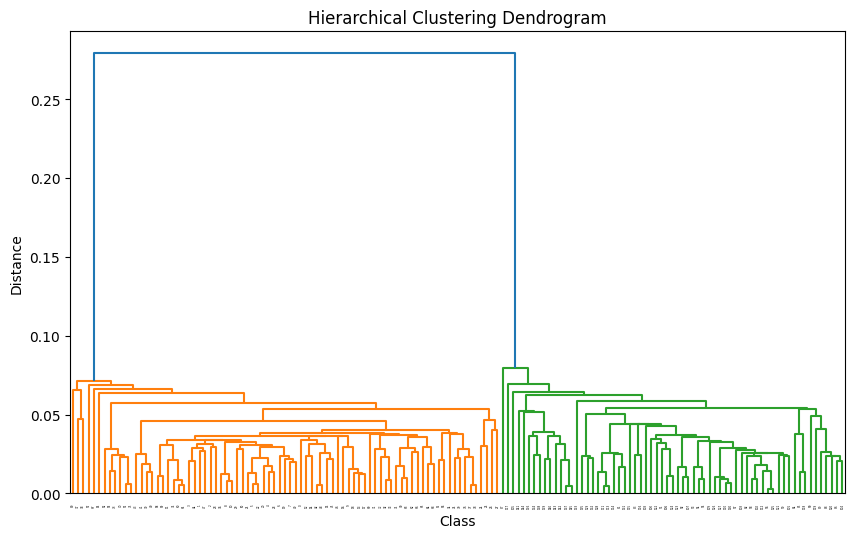

In [4]:
X = df[['x', 'y']]


# Perform hierarchical clustering
linkage_matrix = linkage(X, 'single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix,  leaf_rotation=90, leaf_font_size=2)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Class')
plt.ylabel('Distance')
plt.show()


Enter the distance threshold for cutting the dendrogram: 0.07


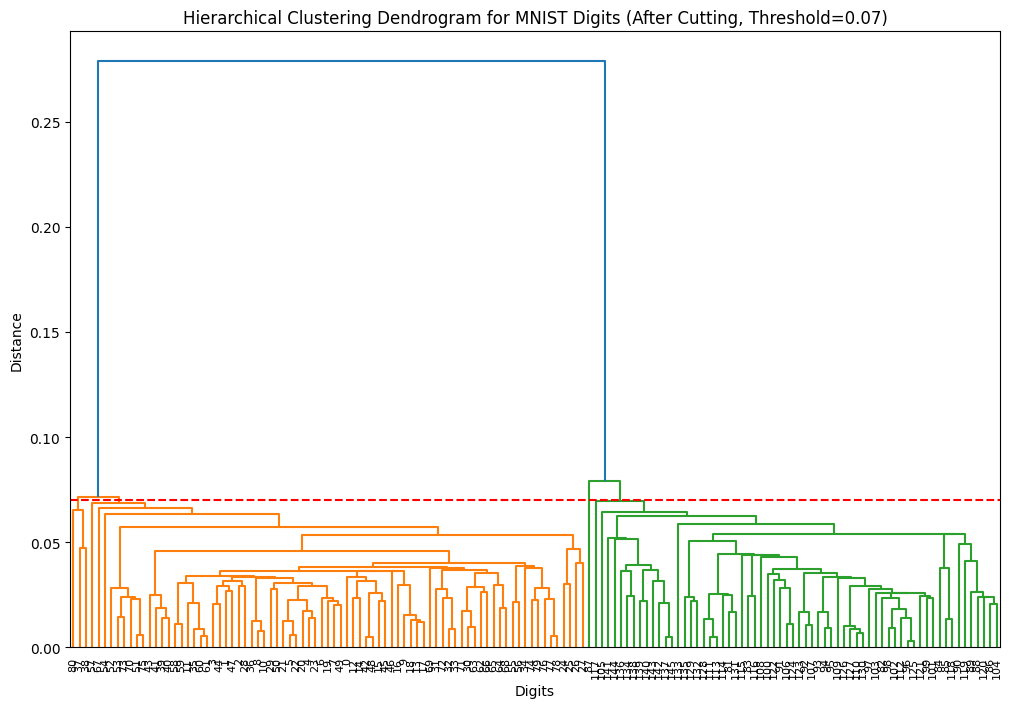

In [8]:
# Choose a distance threshold interactively
distance_threshold = float(input("Enter the distance threshold for cutting the dendrogram: "))

# Cut the dendrogram using the chosen threshold
clusters = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# Plot the dendrogram after cutting
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix,  leaf_rotation=90, leaf_font_size=8)
plt.title(f'Hierarchical Clustering Dendrogram for MNIST Digits (After Cutting, Threshold={distance_threshold})')
plt.xlabel('Digits')
plt.ylabel('Distance')
plt.axhline(y=distance_threshold, c='red', linestyle='--', label=f'Distance Threshold = {distance_threshold}')
plt.show()


In [9]:
# Print the cluster labels or indices
print("Cluster labels after cutting the dendrogram:")
print(clusters)

Cluster labels after cutting the dendrogram:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


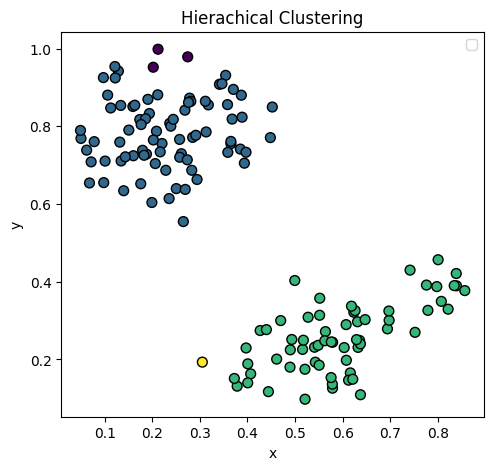

In [10]:
# Plot the data points with colors based on the cluster assignments from k-means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Hierachical Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

## **3. Agrupamiento de conjunto de datos de imágenes MNIST digits**
* Se leen los datos
* Se separan en X y y (para propósitos de comparación)
* Elegimos un subconjunto de 500 imágenes para que no se tarde mucho corriendo el algoritmo.
* Se escalan los datos
* Se utiliza *lingake* para hacer el agrupamiento
* Se grafica el dendograma.
<br>

Posteriormente
* se elige un valor de corte en el dendograma
* Se obtienen los grupos a partir del corte indicado
* Se imprime en que grupo quedó cada punto
<br>

Finalmente
* Se grafican algunas imagenes dentro de los clusters


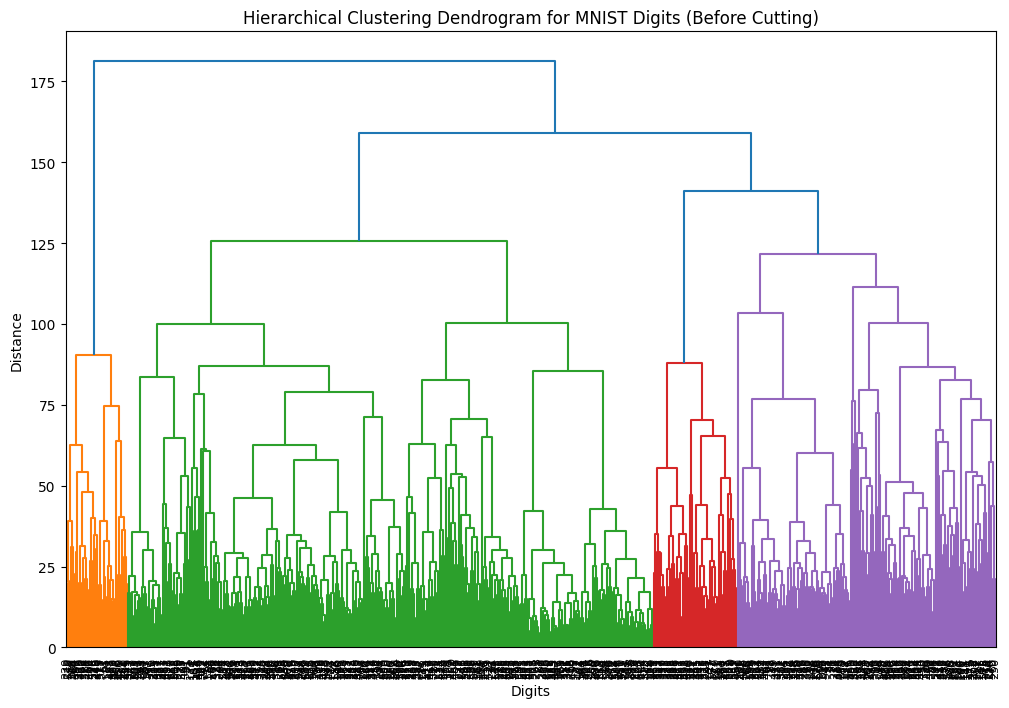

In [6]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')
X = np.array(mnist.data.astype('float32'))
y = np.array(mnist.target.astype('int'))

# Choose a subset of the dataset to speed up processing
subset_size = 600
X_subset = X[:subset_size]
y_subset = y[:subset_size]

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_subset)

# Perform hierarchical clustering
linkage_matrix = linkage(X_standardized, 'ward')

# Plot the dendrogram before cutting
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram for MNIST Digits (Before Cutting)')
plt.xlabel('Digits')
plt.ylabel('Distance')
plt.show()


Enter the distance threshold for cutting the dendrogram: 75


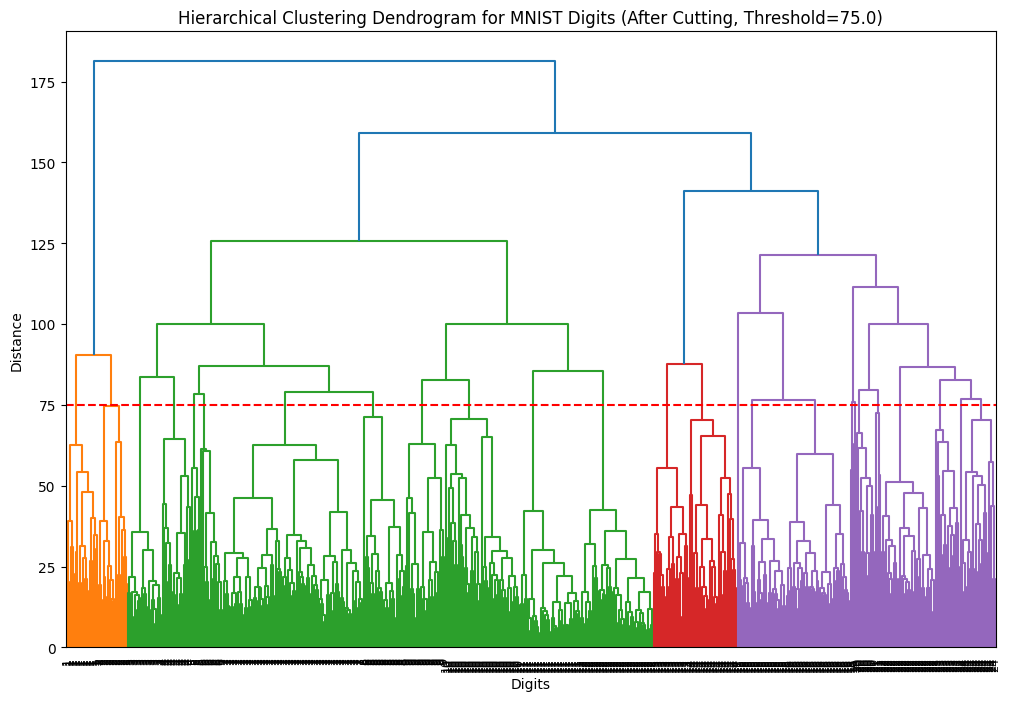

In [7]:

# Choose a distance threshold interactively
distance_threshold = float(input("Enter the distance threshold for cutting the dendrogram: "))

# Cut the dendrogram using the chosen threshold
clusters = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# Plot the dendrogram after cutting
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=clusters, leaf_rotation=90, leaf_font_size=8)
plt.title(f'Hierarchical Clustering Dendrogram for MNIST Digits (After Cutting, Threshold={distance_threshold})')
plt.xlabel('Digits')
plt.ylabel('Distance')
plt.axhline(y=distance_threshold, c='red', linestyle='--', label=f'Distance Threshold = {distance_threshold}')
plt.show()


In [8]:
# Print the cluster labels or indices
print("Cluster labels after cutting the dendrogram:")
print(clusters)

Cluster labels after cutting the dendrogram:
[14 16  5 11  8 24 12 14 12 10 12  9 21 15 12  3  7 10 16  7 21  2  7 11
 12 24  7 14 21 10 24 10 15  4 16  9 16 16  7 15 12 10  6  7  7  7  7  9
  7 22 22  2  6  7  6 10  1  3  8 11  1 10 16  2 16  9 15 11  1 16 12  4
 12 15 22 16 24 11 11  4 22 16 23 15  6 10 20  3  1 10 15  4  8 15 10 16
  6 10 22 11 12  5 12  3 12 11 16 14  1 25  8 14 12 11  2  7  8 24 16  2
 24  2 23  4 12 10 16 10 12 16 22 10 12  7 20 14 22 10 16  7  7  4  7 24
  7  9 10 15  7 22  7 15 12  7  6 15  2 14 20 24  7 24  8 10 20 15  7  3
  7 16  8 24  6  9 12  9  8 11 10 14 12 14 22  3 12  5 23 24  7 24 23  9
 16  5  8  7  8 10 22 24 12 11 10 14 15 11  1 14 12  1 16 12  7 13 24 14
 22  7 16  9 19 15 20  3  7 10  8  7 20  1  3 12 16 13 16 14 10  7 16  9
  7 23 14  3 22 10  1  7 12  1 24 12 24 13 22 14 16  7  7  9  2 15 23  3
  8 10 22  7  7 11 12  7  6  9 16  7 12 13 16 14  7 14 20  1 22  7 16  9
  6  7 11 14  7  2 21 10 16  7 22 15  7  3 15  2  8  3 24  3 13 11 12 15
  7  7

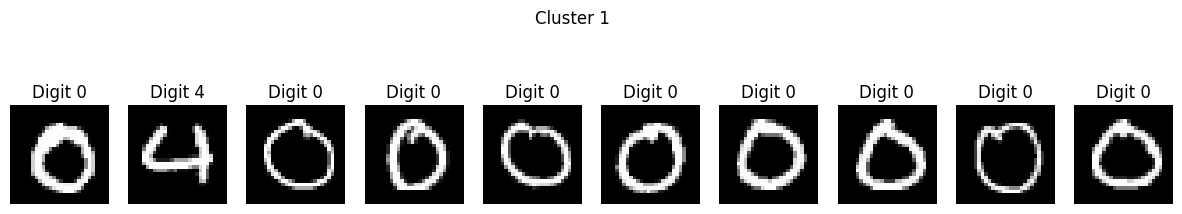

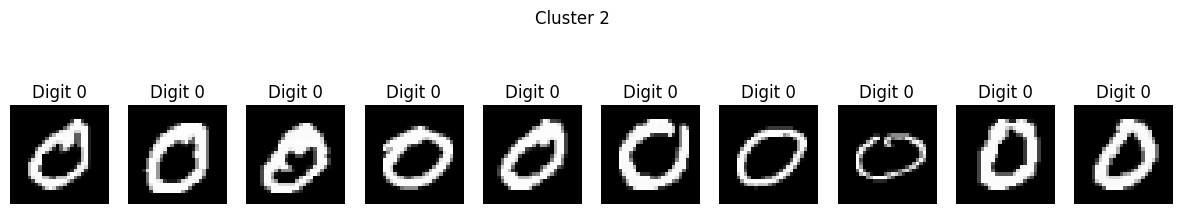

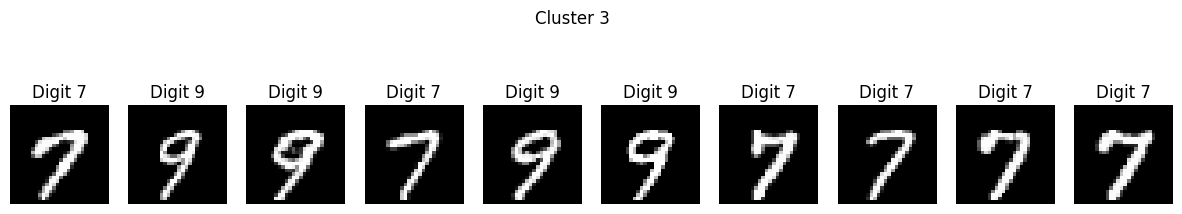

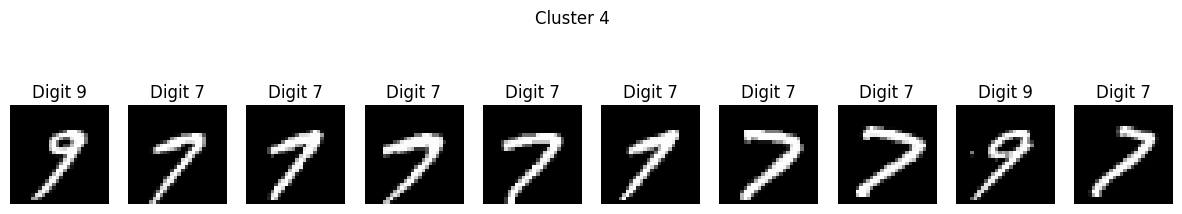

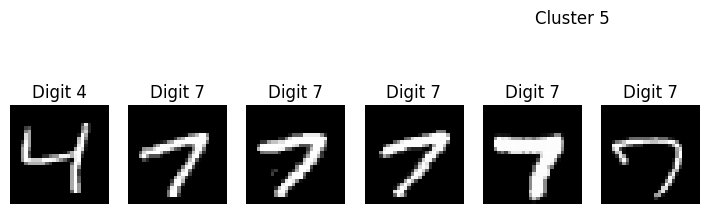

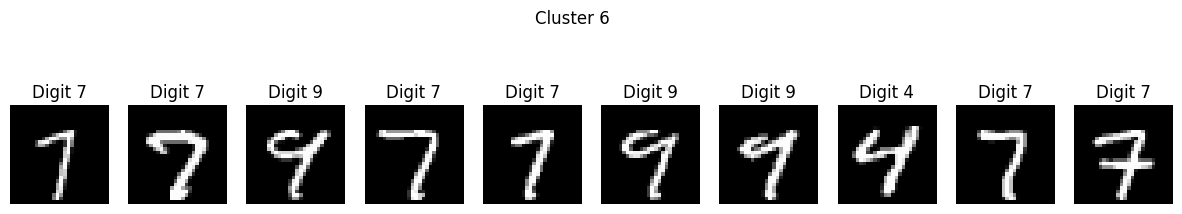

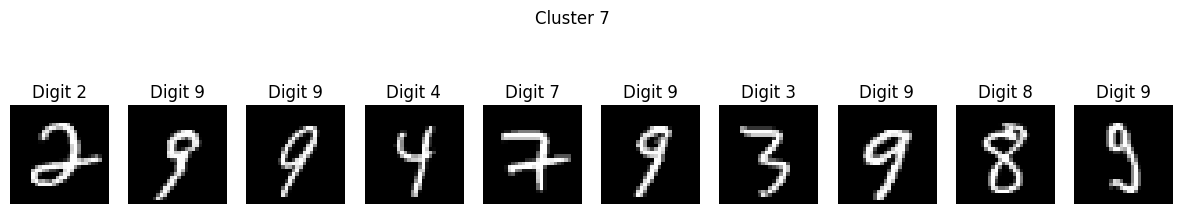

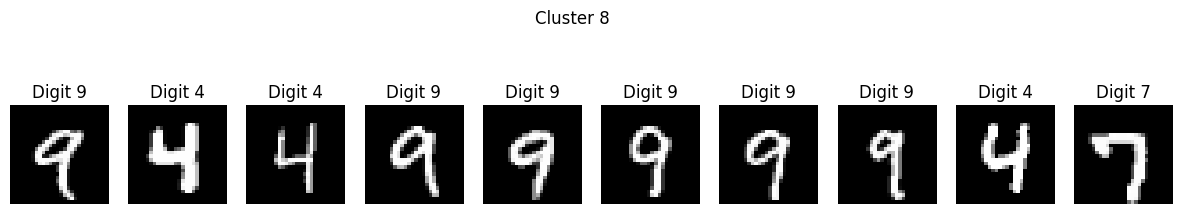

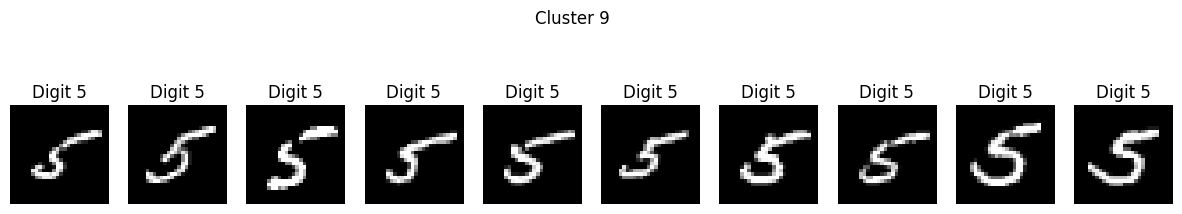

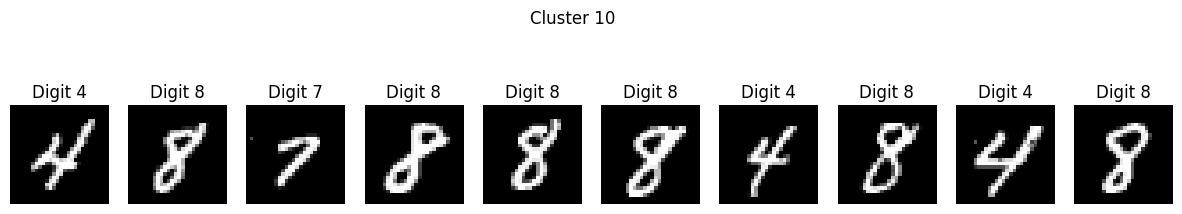

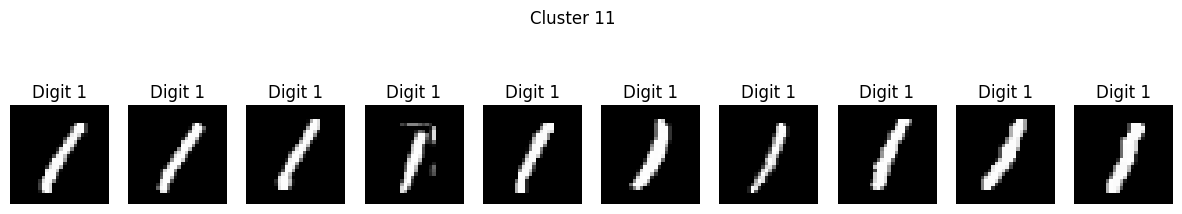

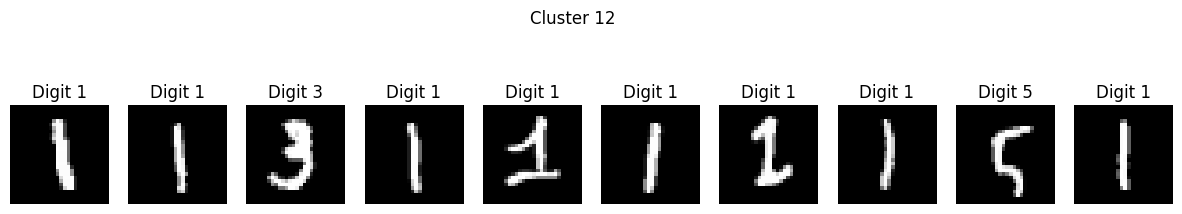

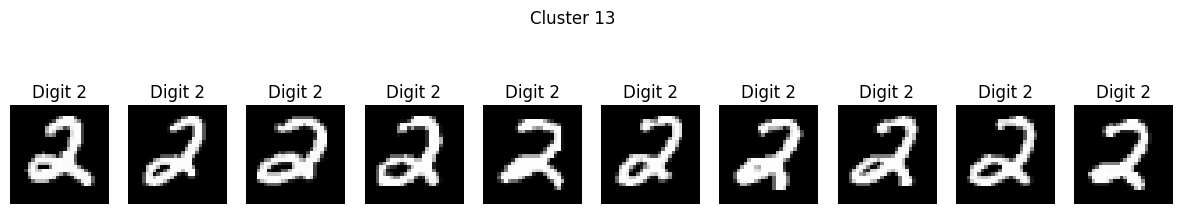

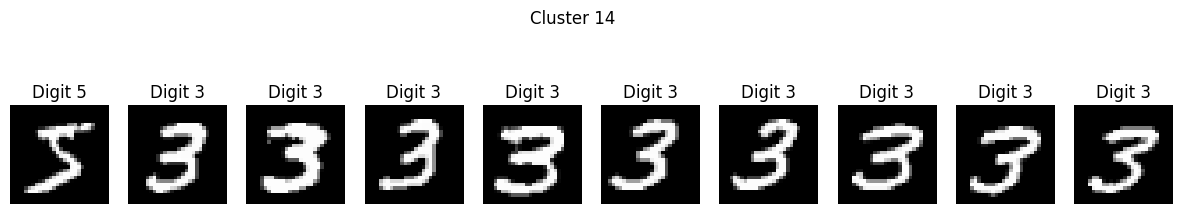

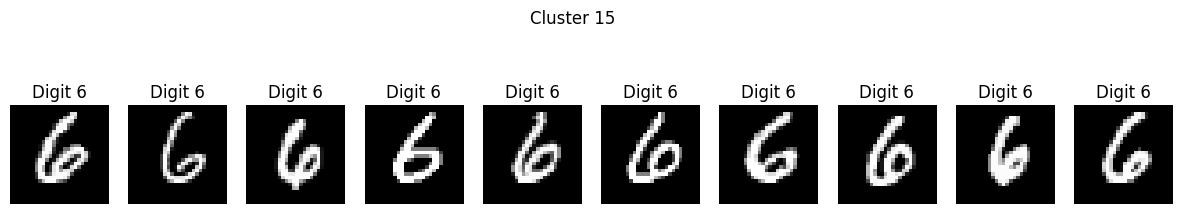

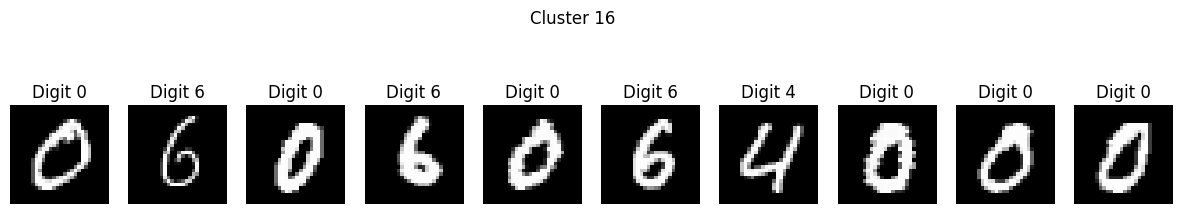

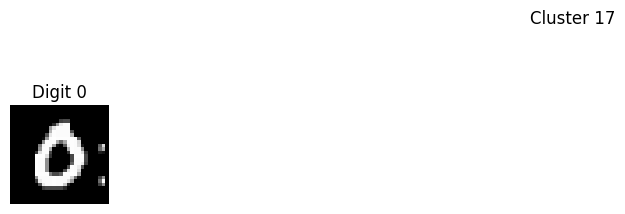

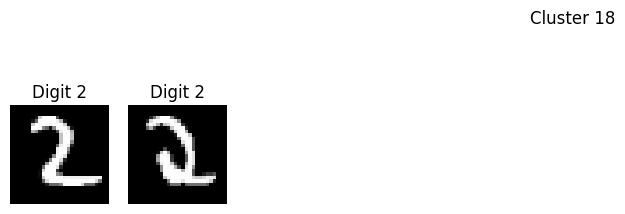

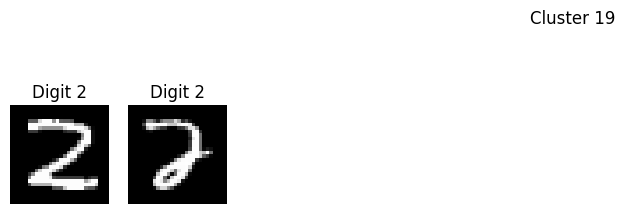

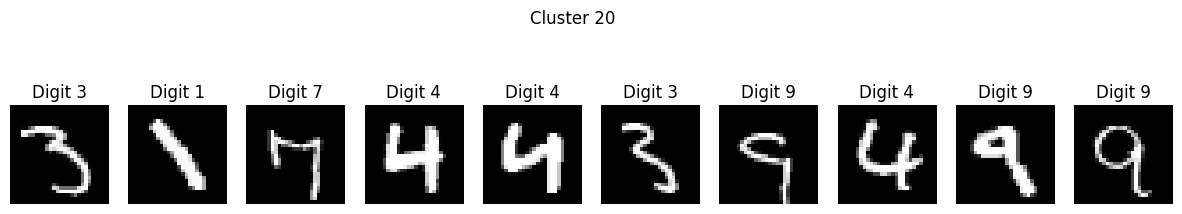

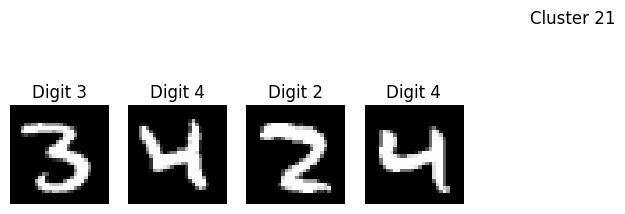

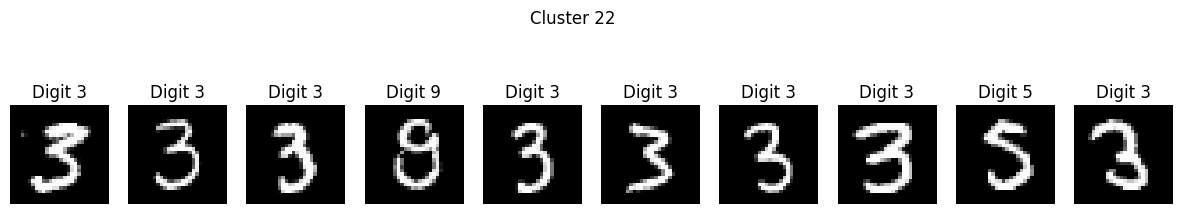

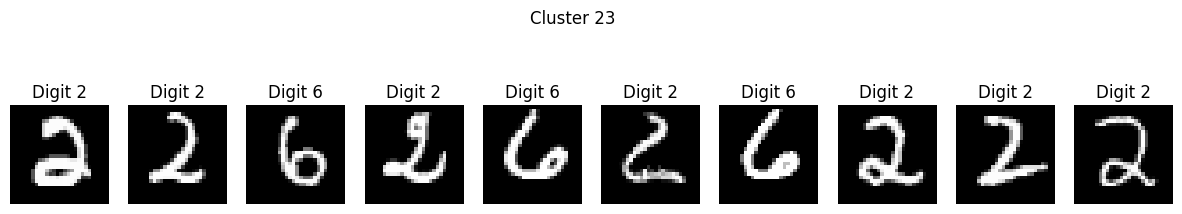

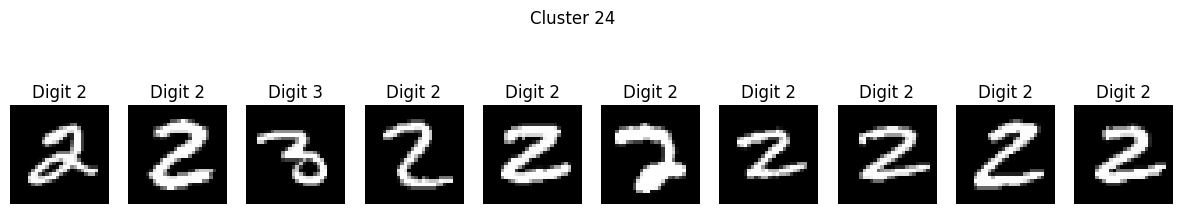

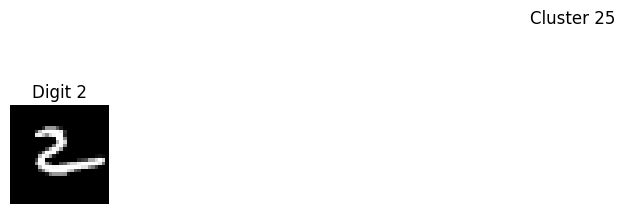

In [9]:

# Visualize images within each cluster
unique_clusters = np.unique(clusters)

for cluster_num in unique_clusters:
    cluster_indices = np.where(clusters == cluster_num)[0]

    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(cluster_indices[:10]):  # Display up to 10 digits per cluster
        plt.subplot(1, 10, i + 1)
        plt.imshow(X_subset[idx].reshape(28, 28), cmap='gray')
        plt.title(f'Digit {y_subset[idx]}')
        plt.axis('off')

    plt.suptitle(f'Cluster {cluster_num}')
    plt.show()


## **4. Ejercicio, agrupar el conjunto de datos de vinos**
* Usa el conjunto de datos de vinos, el cual esta dentro de Scikitlearn. Busca en datasets como leerlos.
* Utiliza la clase *linkage* con el algoritmo jerárquico aglomerativo para hacer un agrupamiento.
* Prueba distintos métodos para combinar clusters.
* Prueba distintos puntos de corte.
* Con fines de comparación, al igual que en el Iris dataset, grafica con color las clases originales de los objetos y con color los grupos que se encontraron.
* Responde, ¿Tiene algún impacto escalar los datos en este problema?

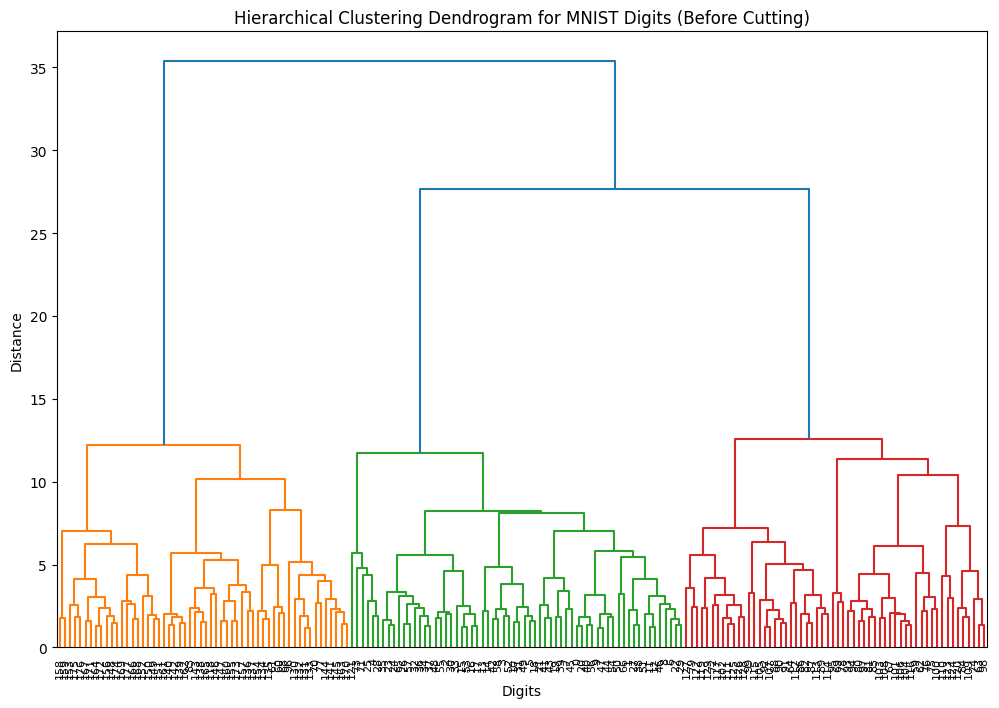

In [14]:
# Load MNIST dataset
from sklearn.datasets import load_wine
wine = load_wine()

X = wine.data  # Features
y = wine.target  # Target variable (for coloring the points in the plot)

# Choose a subset of the dataset to speed up processing
#subset_size = 600
#X_subset = X[:subset_size]
#y_subset = y[:subset_size]

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform hierarchical clustering
linkage_matrix = linkage(X_standardized, 'ward')

# Plot the dendrogram before cutting
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram for Wine')
plt.xlabel('Digits')
plt.ylabel('Distance')
plt.show()

Enter the distance threshold for cutting the dendrogram: 15


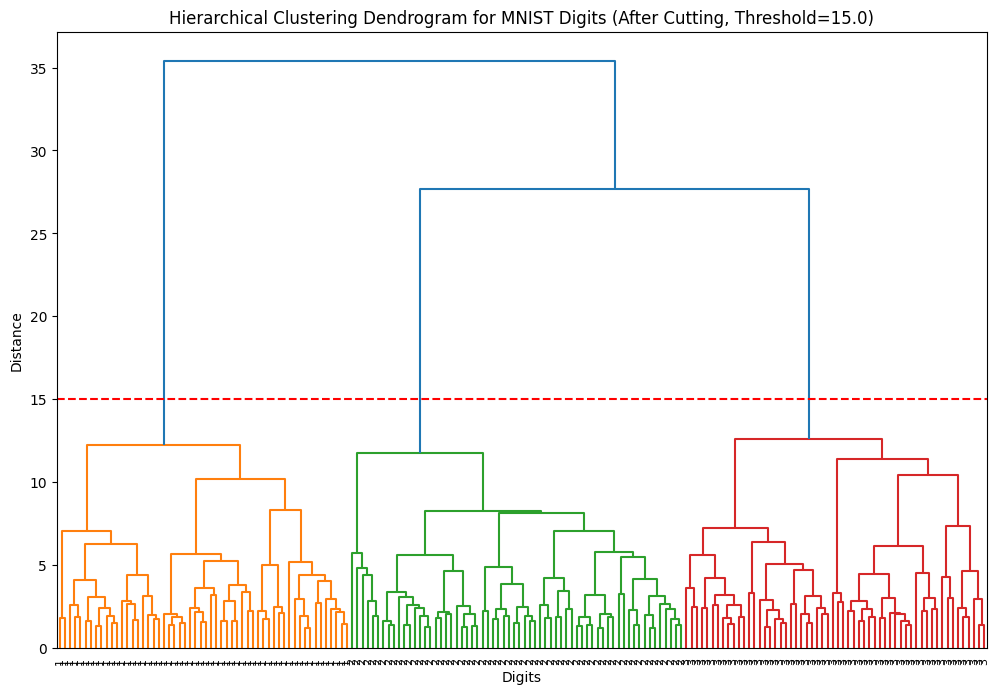

In [15]:
# Choose a distance threshold interactively
distance_threshold = float(input("Enter the distance threshold for cutting the dendrogram: "))

# Cut the dendrogram using the chosen threshold
clusters = fcluster(linkage_matrix, t=distance_threshold, criterion='distance')

# Plot the dendrogram after cutting
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=clusters, leaf_rotation=90, leaf_font_size=8)
plt.title(f'Hierarchical Clustering Dendrogram for MNIST Digits (After Cutting, Threshold={distance_threshold})')
plt.xlabel('Digits')
plt.ylabel('Distance')
plt.axhline(y=distance_threshold, c='red', linestyle='--', label=f'Distance Threshold = {distance_threshold}')
plt.show()


In [16]:
# Print the cluster labels or indices
print("Cluster labels after cutting the dendrogram:")
print(clusters)

Cluster labels after cutting the dendrogram:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 1 3 3 3 2 2 3 1 3 1 2 3 2
 3 3 3 1 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


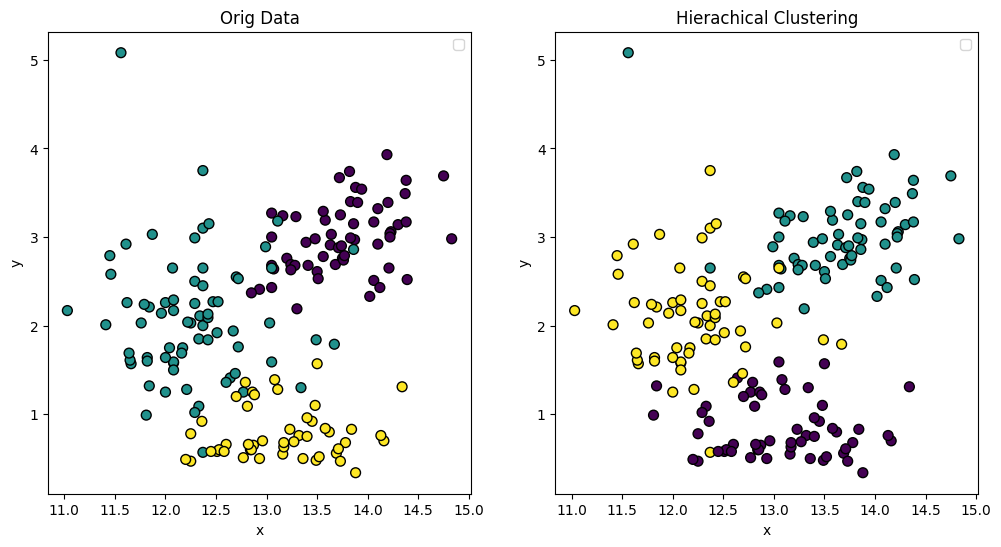

In [24]:
# Plot the data points with colors based on the cluster assignments from k-means
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 6], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('Orig Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 6], c=clusters, cmap='viridis', edgecolor='k', s=50)
plt.title('Hierachical Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()